<a href="https://colab.research.google.com/github/youngsiiimba/pump-sensor-data/blob/main/pump_sensor_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

##Data Import

In [ ]:
!git clone https://github.com/youngsiiimba/pump-sensor-data.git

Cloning into 'pump-sensor-data'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:
!unzip /content/pump-sensor-data/pump_sensor_data_zipped.zip

Archive:  /content/pump-sensor-data/pump_sensor_data_zipped.zip
  inflating: sensor.csv              


In [ ]:
df = pd.read_csv('/content/sensor.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [ ]:
df.head(10)

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
5,5,2018-04-01 00:05:00,2.453588,47.09201,53.1684,46.397568,637.6157,78.18568,13.41146,16.16753,...,42.70833,38.773150,63.65741,51.79398,38.773150,164.6412,66.55093,241.6088,201.6782,NORMAL
6,6,2018-04-01 00:06:00,2.455556,47.04861,53.1684,46.397568,633.3333,75.81614,13.43316,16.13136,...,43.22916,38.194440,61.92130,51.79398,39.062500,171.8750,67.70834,240.1620,200.2315,NORMAL
7,7,2018-04-01 00:07:00,2.449653,47.13541,53.1684,46.397568,630.6713,75.77331,13.25231,16.12413,...,42.96875,38.194443,59.60648,50.92593,39.351850,178.5301,68.57639,241.3194,201.0995,NORMAL
8,8,2018-04-01 00:08:00,2.463426,47.09201,53.1684,46.397568,631.9444,74.58916,13.28848,16.13136,...,42.18750,38.194440,57.87037,50.63657,39.351850,182.0023,69.44444,243.0556,201.6782,NORMAL
9,9,2018-04-01 00:09:00,2.445718,47.17882,53.1684,46.397568,641.7823,74.57428,13.38252,16.24711,...,41.66666,39.062500,56.42361,50.63657,39.062500,186.6319,69.73380,246.5278,200.8102,NORMAL


In [ ]:
# The first column has no name. Give it a name!
df.rename(columns={ df.columns[0]: "Samplenr" }, inplace = True)

##Data analysis

###How much data do we have ?

In [ ]:
df.shape

(220320, 55)

###How many different machine states are there?

In [ ]:
possible_machine_states = list(df.machine_status.unique())
possible_machine_states

['NORMAL', 'BROKEN', 'RECOVERING']

###How much of the data is "NORMAL" data ? 

In [ ]:
# Get all rows where machine status was "NORMAL"
df_status_NORMAL = df[ df["machine_status"] == "NORMAL" ]

In [ ]:
nr_rows_machine_status_NORMAL = df_status_NORMAL.shape[0]

In [ ]:
nr_rows_total = df.shape[0]

In [ ]:
percent_machine_status_NORMAL = \
    (nr_rows_machine_status_NORMAL / nr_rows_total) * 100.0

print('The percentage of "NORMAL" data is: ', percent_machine_status_NORMAL)

The percentage of "NORMAL" data is:  93.42592592592592


###How many times was the machine broken?

In [ ]:
# Get all rows where machine status was "BROKEN"
df_status_BROKEN = df[ df["machine_status"] == "BROKEN" ]
df_status_BROKEN

,Samplenr,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
17155,17155,2018-04-12 21:55:00,0.000000,53.342010,52.821180,43.402775,202.526031,49.79289,3.219039,16.890910,...,50.78125,50.92593,51.215280,50.636570,46.006940,409.143500,121.527800,401.909700,324.6528,BROKEN
24510,24510,2018-04-18 00:30:00,1.093982,42.534720,47.699650,41.449650,206.038757,60.30106,12.304690,15.154800,...,42.70833,34.72222,31.539350,34.432870,33.275460,59.895830,44.560180,177.662000,183.7384,BROKEN
69318,69318,2018-05-19 03:18:00,2.258796,47.265630,52.734370,43.446178,200.115738,66.14643,13.592300,15.914350,...,39.06250,35.01157,37.905090,39.062500,45.428240,144.675900,49.768520,246.238400,257.5231,BROKEN
77790,77790,2018-05-25 00:30:00,2.321759,47.482640,51.475693,42.795135,612.152800,67.30158,14.062500,16.608800,...,202.34370,65.68287,57.870370,127.893500,153.935200,155.381900,65.682870,220.196800,267.3611,BROKEN
128040,128040,2018-06-28 22:00:00,0.364005,40.190970,45.225690,40.190971,201.368622,0.00000,11.335360,15.270540,...,32.29166,28.06713,28.067129,29.513889,29.224537,29.224537,29.513889,32.407406,NaN,BROKEN
141131,141131,2018-07-08 00:11:00,0.001968,45.138890,52.907990,45.355900,500.000000,1.40131,0.028935,0.036169,...,36.19791,37.32639,35.300930,38.194440,43.402780,99.537030,44.849540,192.129600,174.7685,BROKEN
166440,166440,2018-07-25 14:00:00,2.318808,45.833332,52.994790,43.880210,420.503448,72.52040,14.185470,16.247110,...,51.30208,52.10200,52.662040,67.129630,43.981480,230.324100,69.733800,NaN,205.7292,BROKEN


In [ ]:
nr_rows_machine_status_BROKEN = df_status_BROKEN.shape[0]

**We can see from the data frame above that the machine was broken at 7 different instances.**

###Let's visual the three states in a bar diagram

In [ ]:
df_status_RECOVERING = df[ df["machine_status"] == "RECOVERING" ]
nr_rows_machine_status_RECOVERING = df_status_RECOVERING.shape[0]

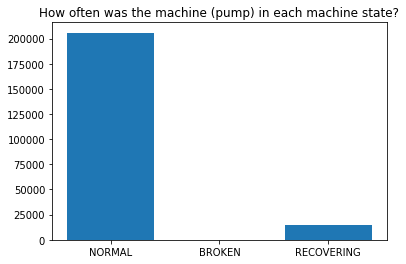

In [ ]:
xpos = [1,2,3]
data = [nr_rows_machine_status_NORMAL,
        nr_rows_machine_status_BROKEN,
        nr_rows_machine_status_RECOVERING]

fig, ax = plt.subplots()
ax.bar(xpos,data)
ax.set_xticks(xpos)
ax.set_xticklabels(possible_machine_states)
ax.set_title("How often was the machine (pump) in each machine state?")
plt.show()

###How long were the recovering phases? How long did it take to repair the machine?

In [ ]:
row_numbers_machine_BROKEN = list(df_status_BROKEN["Samplenr"].values)
row_numbers_machine_BROKEN

[17155, 24510, 69318, 77790, 128040, 141131, 166440]

In [ ]:
recovering_times_hours = []

for i in row_numbers_machine_BROKEN:
    print("\nMachine in status BROKEN in row: {0}".format(i) )
    
    go_further = True
    j = i
    while go_further:
        j += 1
        machine_status_in_row_j = df.iloc[j]["machine_status"]        
        if machine_status_in_row_j != "RECOVERING":
            go_further = False
            
    print("Machine went back to status {0} in row: {1}"
          .format(machine_status_in_row_j, j-i)
          )
    recovering_hours = (j-i)/60
    recovering_days  = recovering_hours / 24
    print("Machine was in RECOVERING state for {0:.1f} hours / {1:.1f} days"
          .format( recovering_hours, recovering_days )
         )
    
    recovering_times_hours.append(recovering_hours)


Machine in status BROKEN in row: 17155
Machine went back to status NORMAL in row: 945
Machine was in RECOVERING state for 15.8 hours / 0.7 days

Machine in status BROKEN in row: 24510
Machine went back to status NORMAL in row: 3111
Machine was in RECOVERING state for 51.9 hours / 2.2 days

Machine in status BROKEN in row: 69318
Machine went back to status NORMAL in row: 1313
Machine was in RECOVERING state for 21.9 hours / 0.9 days

Machine in status BROKEN in row: 77790
Machine went back to status NORMAL in row: 606
Machine was in RECOVERING state for 10.1 hours / 0.4 days

Machine in status BROKEN in row: 128040
Machine went back to status NORMAL in row: 8391
Machine was in RECOVERING state for 139.8 hours / 5.8 days

Machine in status BROKEN in row: 141131
Machine went back to status NORMAL in row: 42
Machine was in RECOVERING state for 0.7 hours / 0.0 days

Machine in status BROKEN in row: 166440
Machine went back to status NORMAL in row: 76
Machine was in RECOVERING state for 1.3

In [ ]:
recovering_times_hours

[15.75, 51.85, 21.883333333333333, 10.1, 139.85, 0.7, 1.2666666666666666]

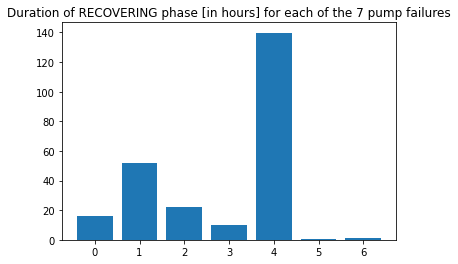

In [ ]:
xpos = np.arange( len(recovering_times_hours) )

fig, ax = plt.subplots()
ax.bar(xpos,recovering_times_hours)
ax.set_xticks(xpos)
ax.set_xticklabels(xpos)
ax.set_title("Duration of RECOVERING phase [in hours] for each of the 7 pump failures")
plt.show()

The quickest repair time

In [ ]:
min(recovering_times_hours)

0.7

The longest repair time

In [ ]:
max(recovering_times_hours)

139.85

Let's visually see when the machine was broken

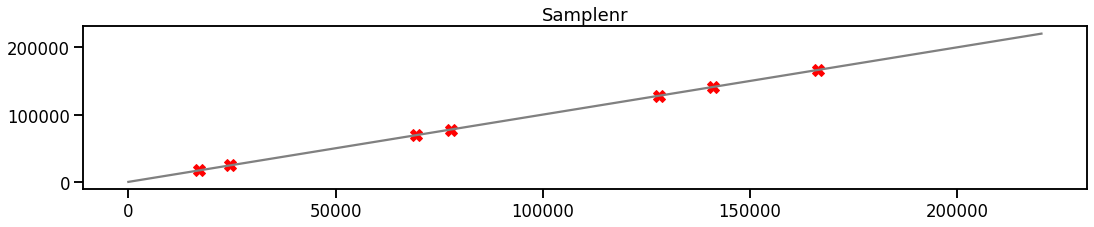

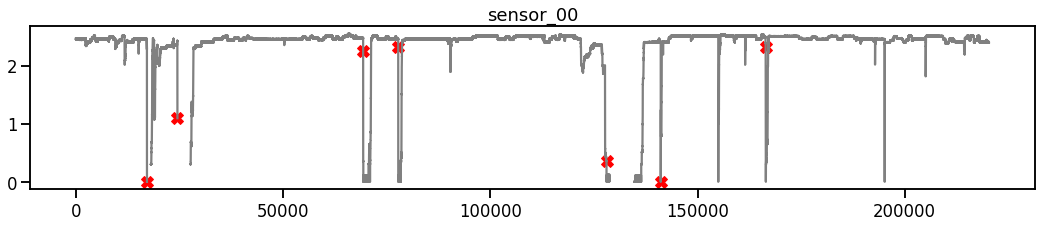

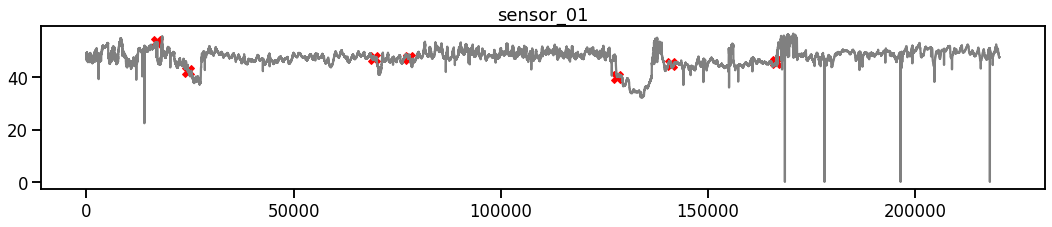

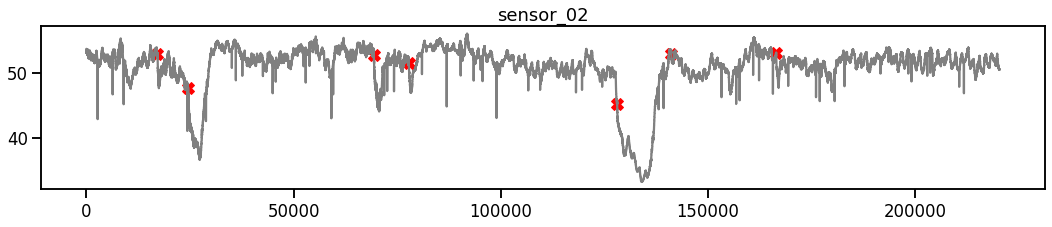

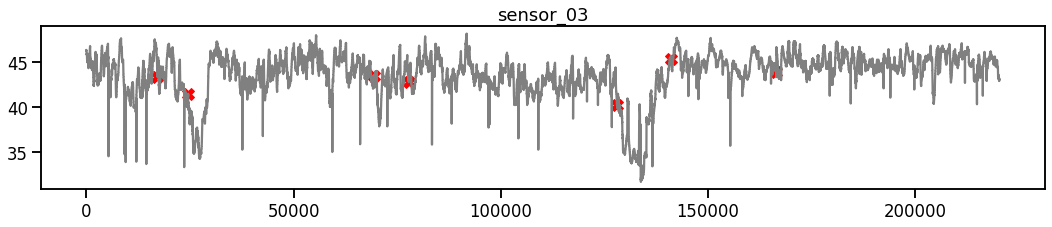

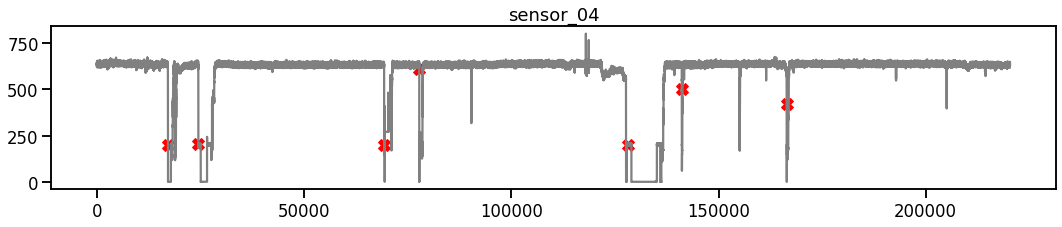

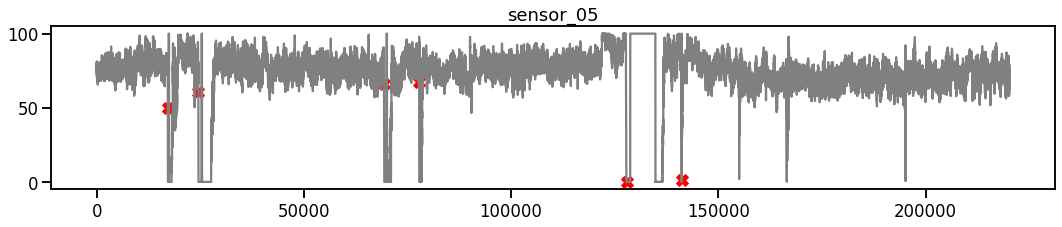

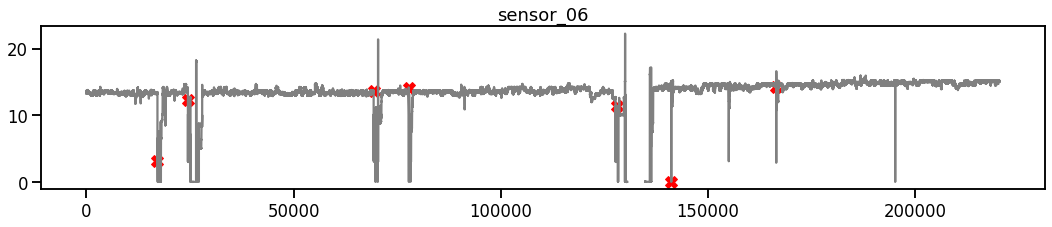

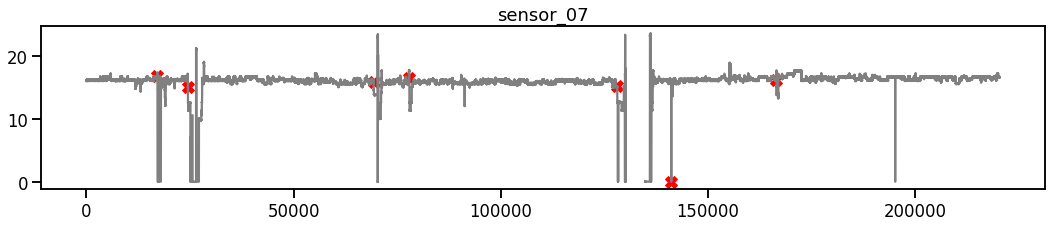

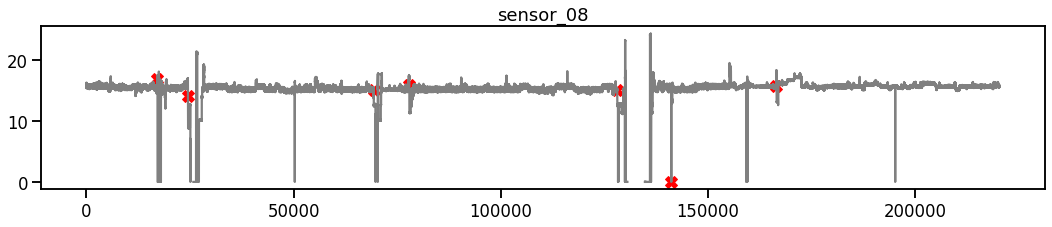

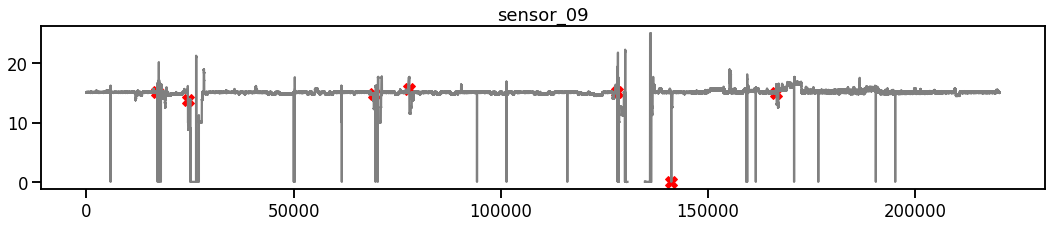

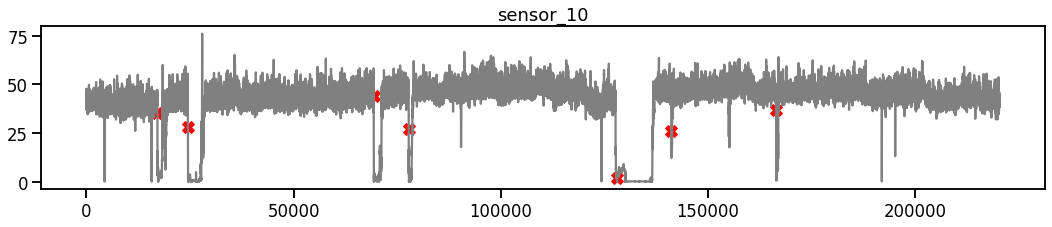

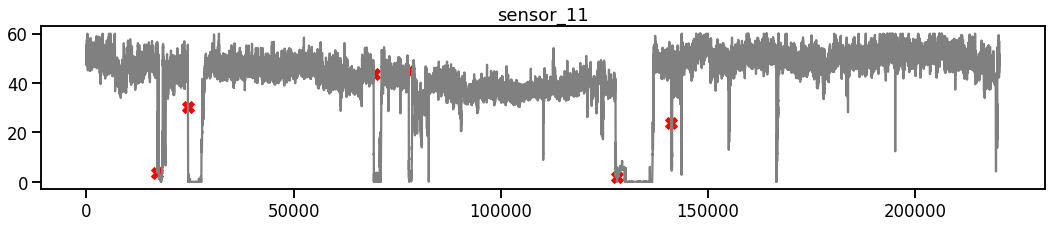

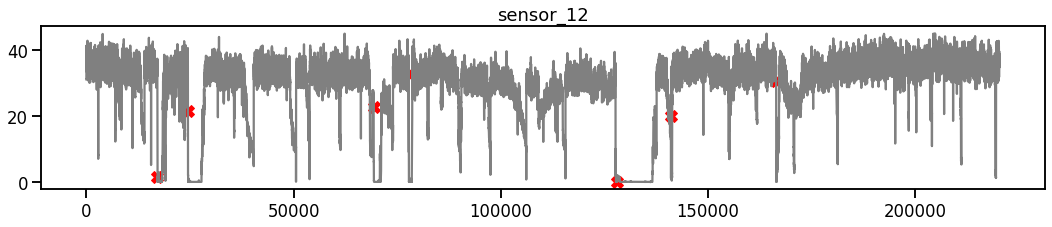

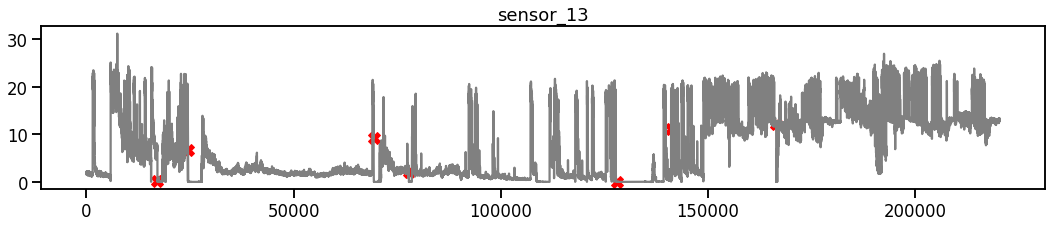

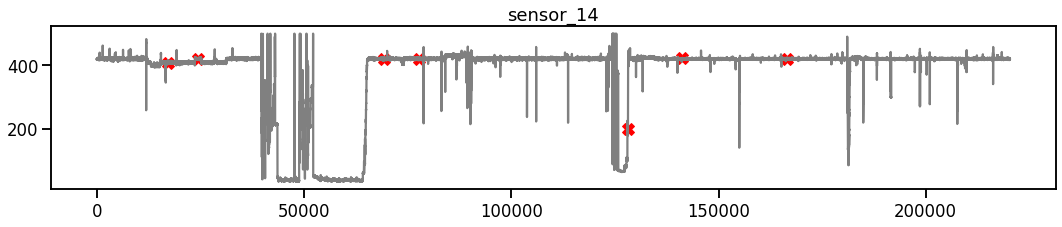

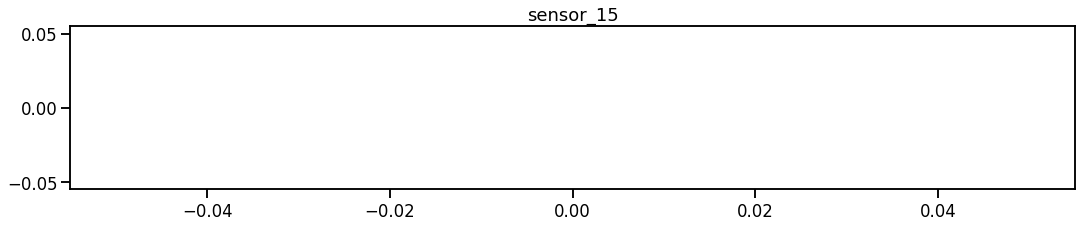

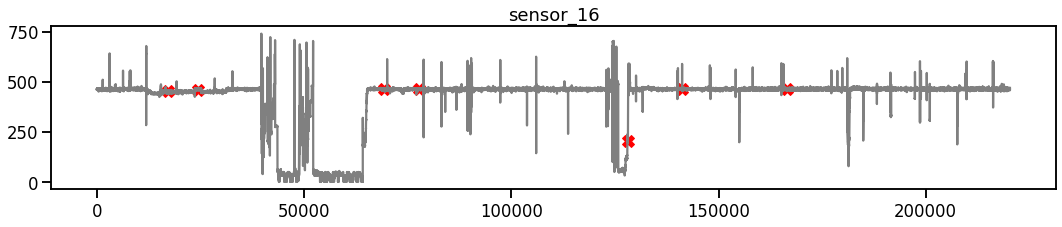

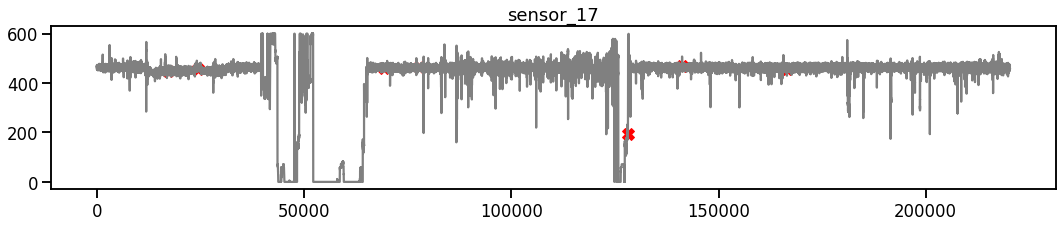

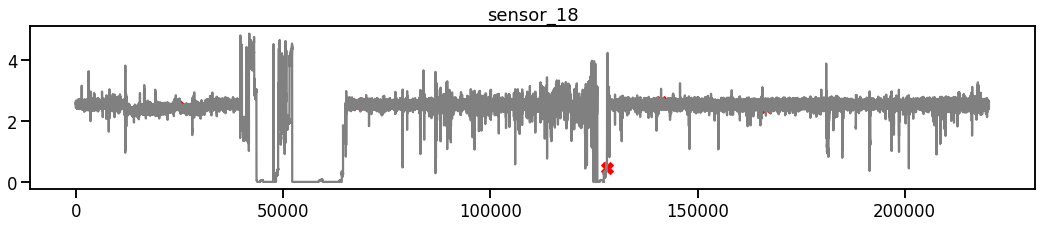

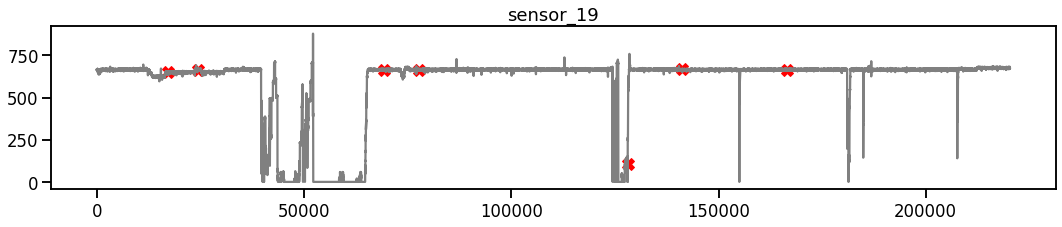

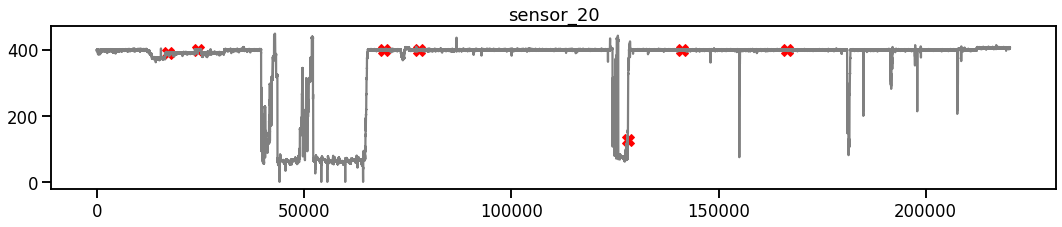

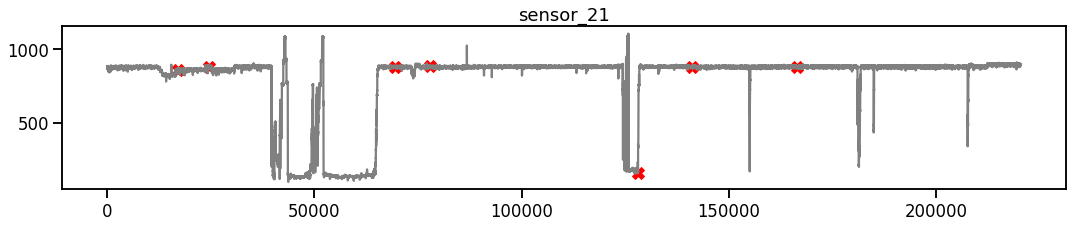

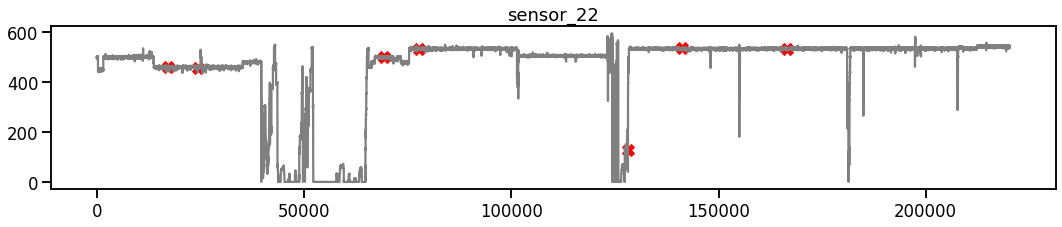

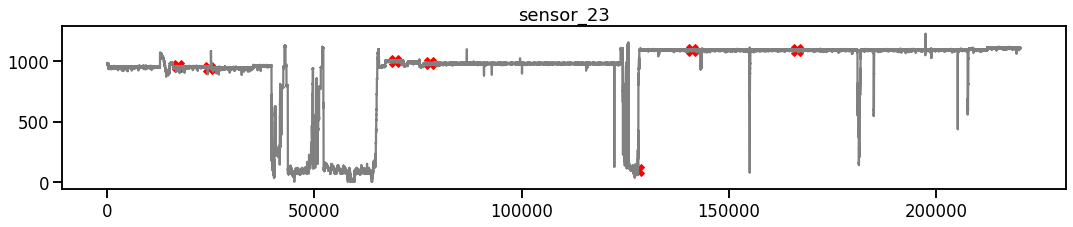

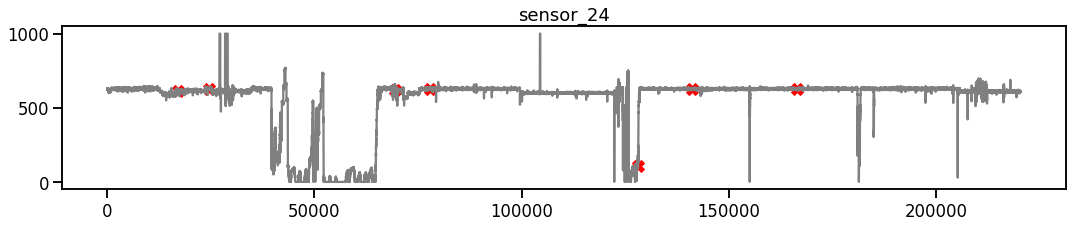

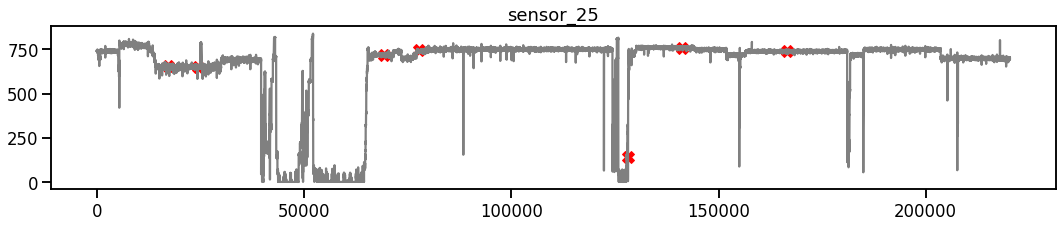

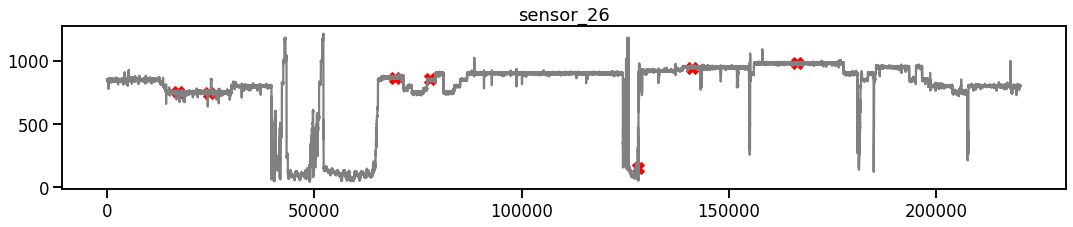

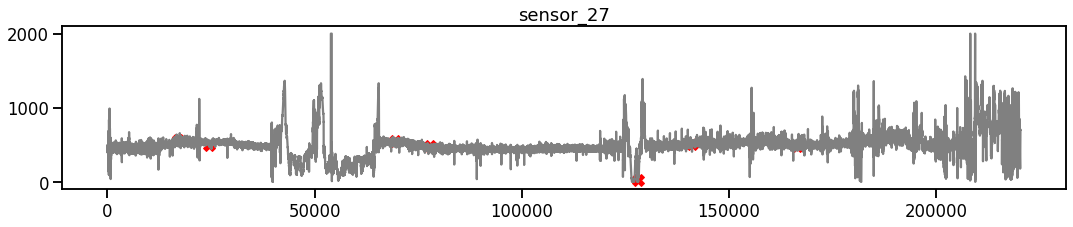

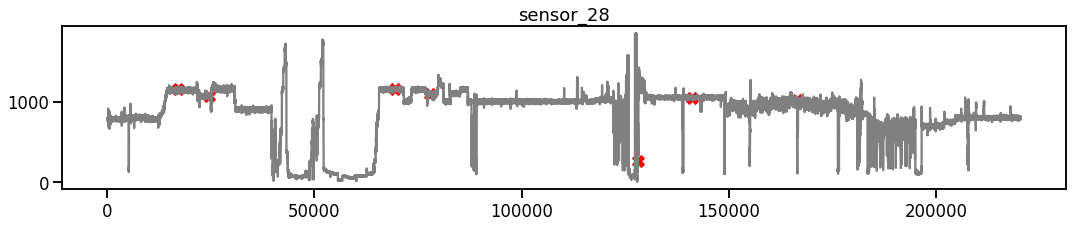

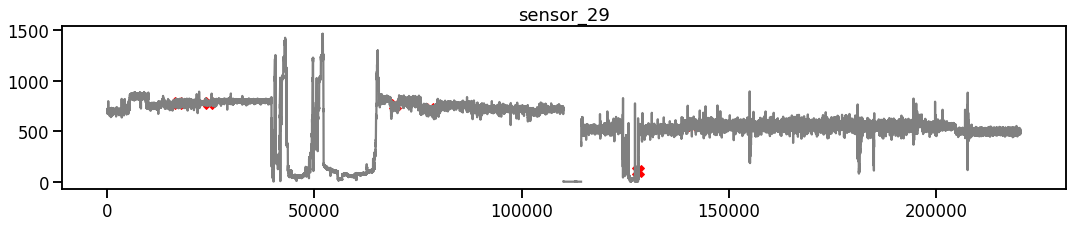

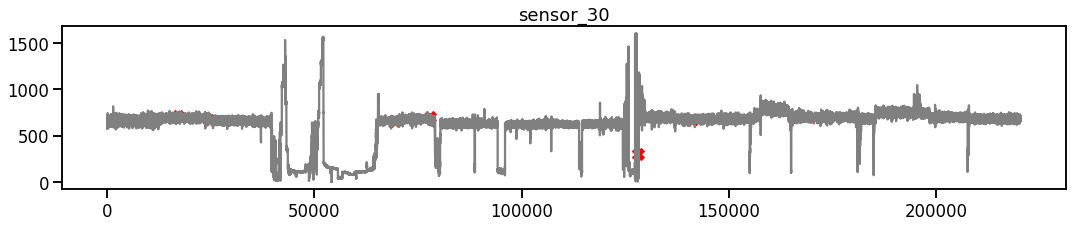

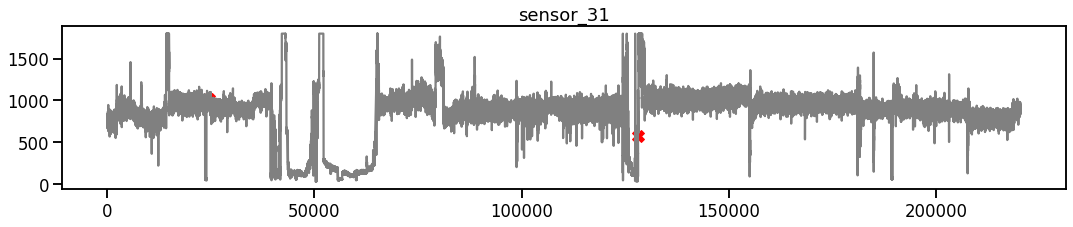

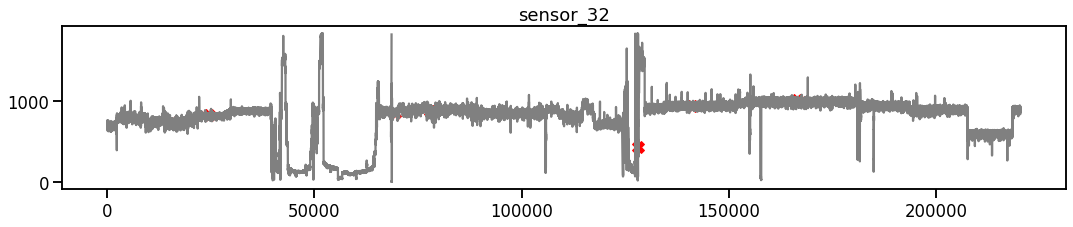

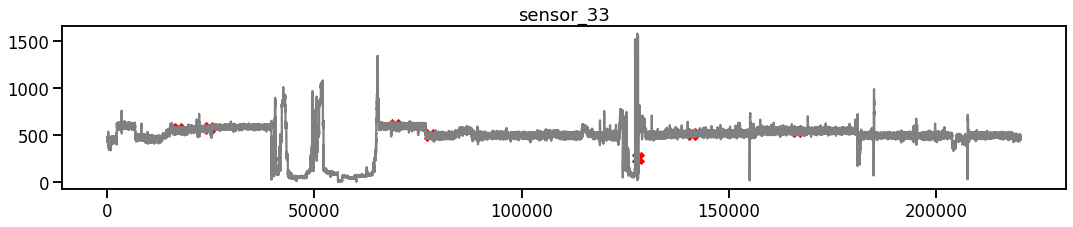

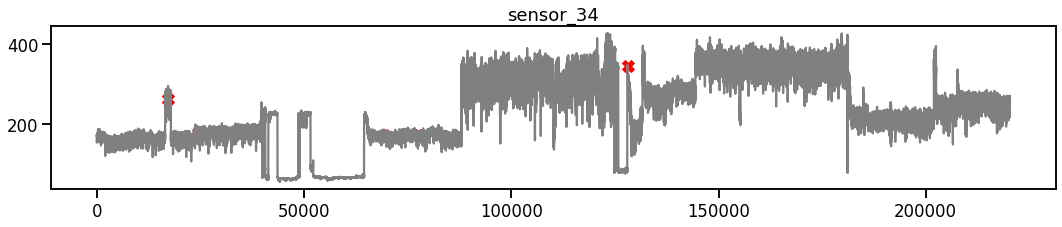

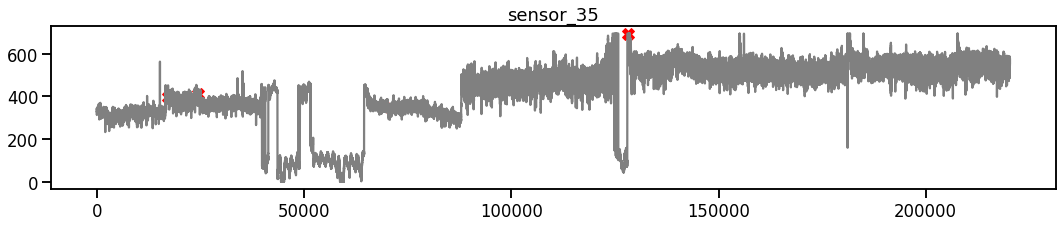

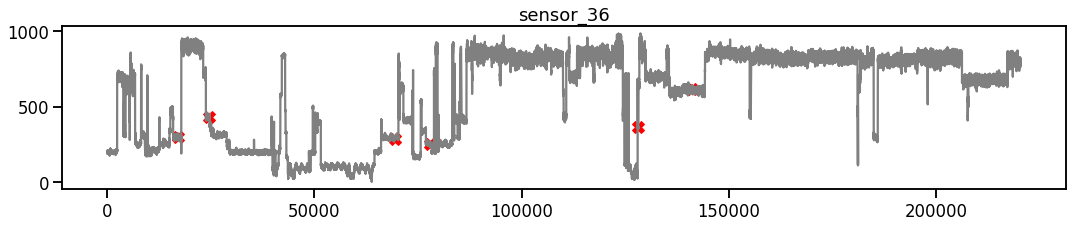

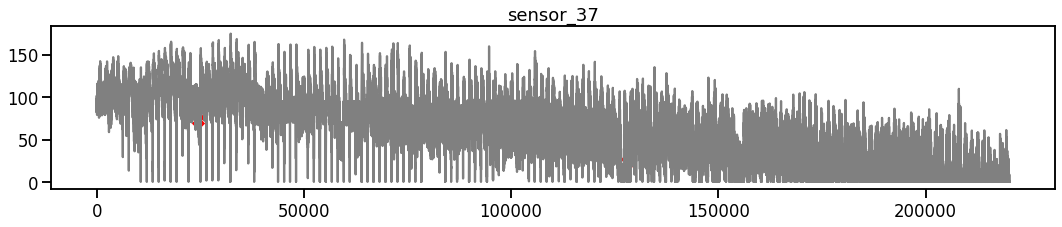

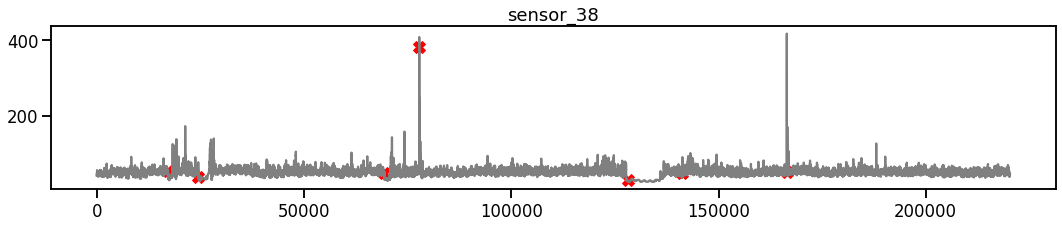

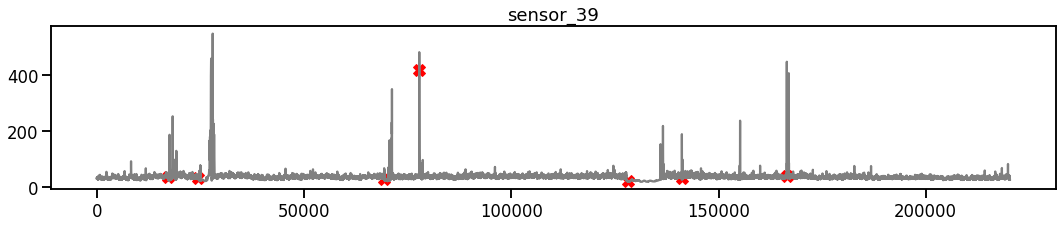

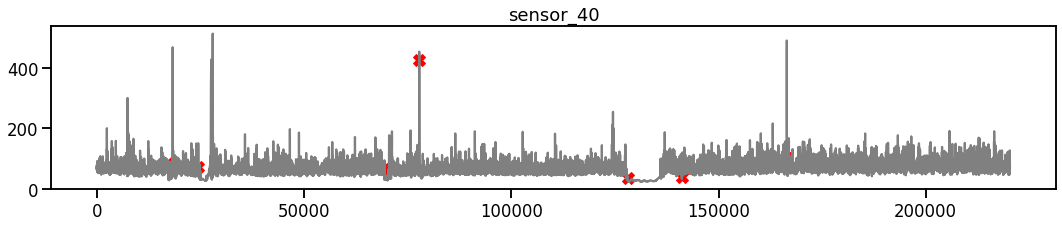

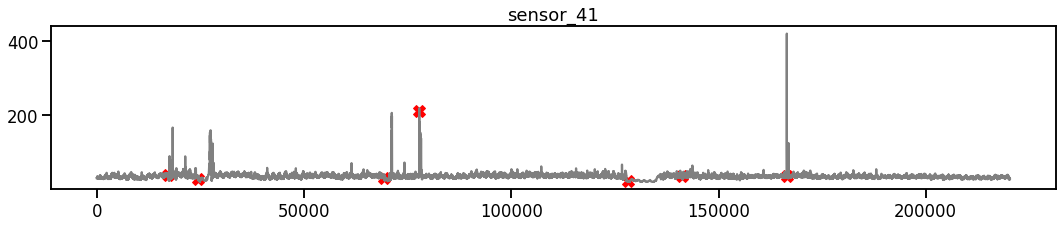

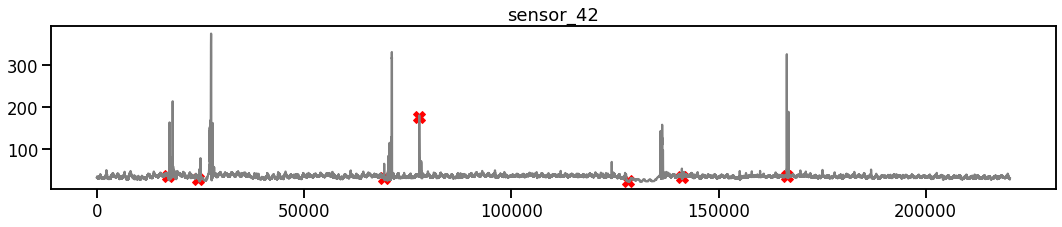

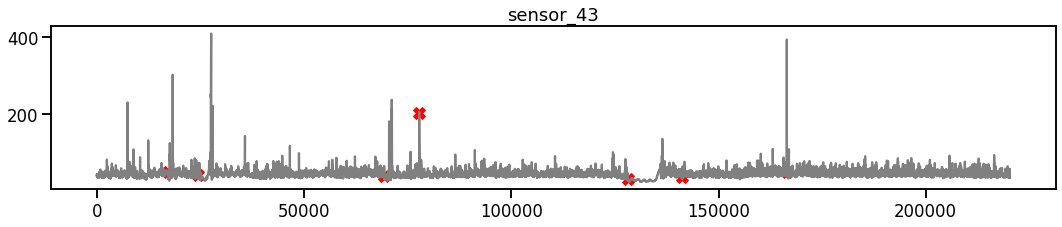

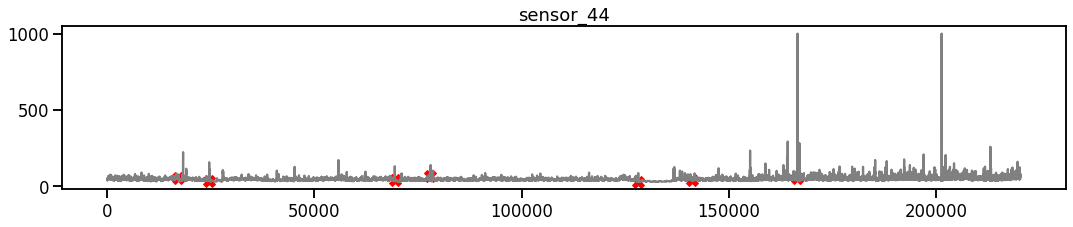

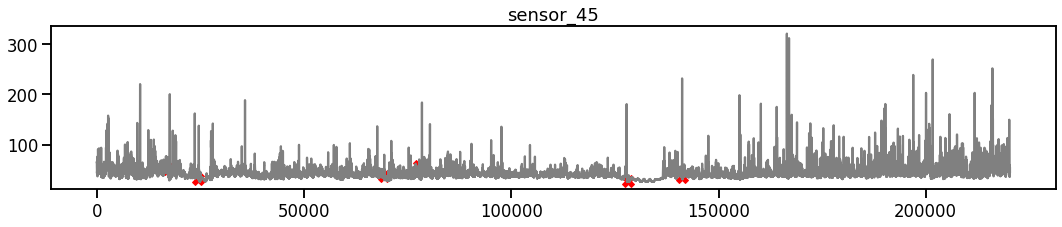

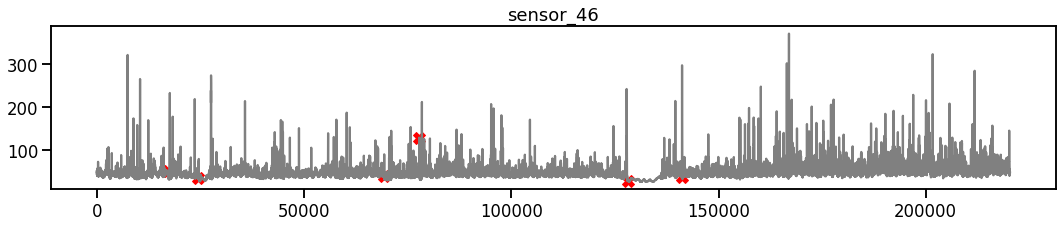

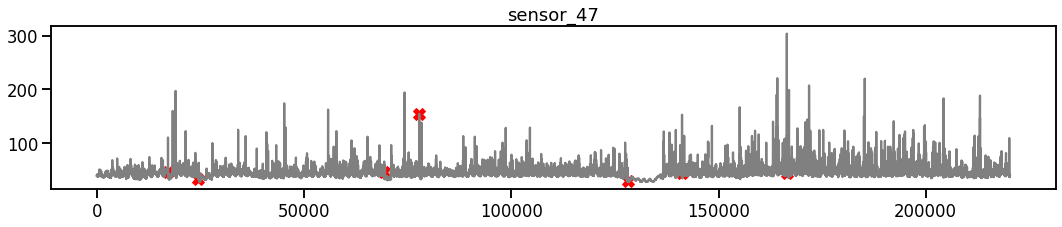

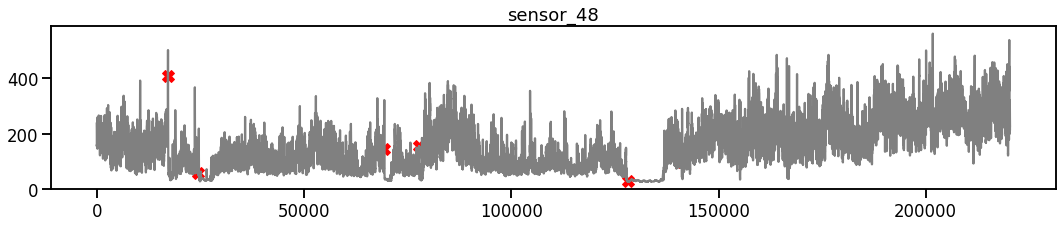

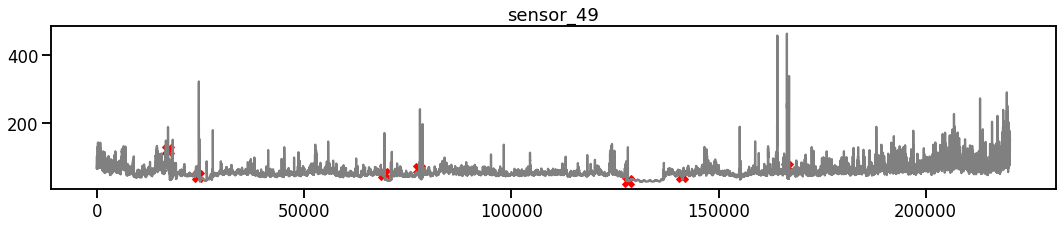

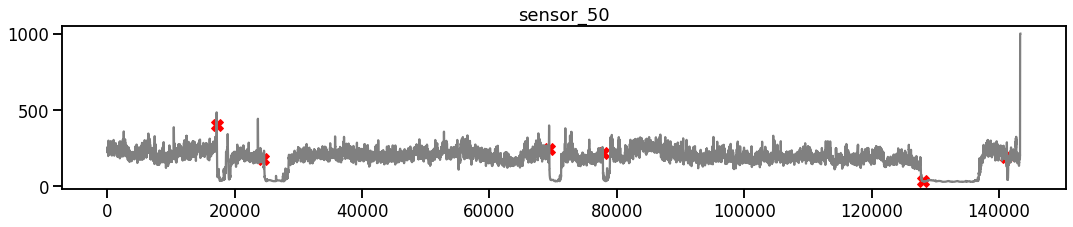

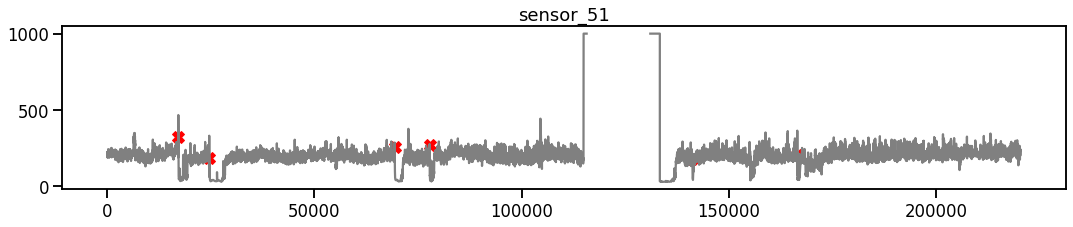

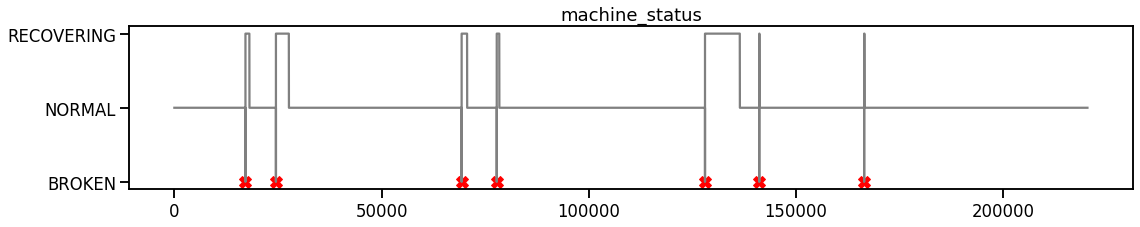

In [23]:
dfBroken = df[df['machine_status']=='BROKEN']
dfSensors = df.drop(['machine_status'], axis=1)
dfSensors = df.drop(['timestamp'], axis=1)
sensorNames=dfSensors.columns
for sensor in sensorNames:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(dfBroken[sensor], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(df[sensor], color='grey')
    _ = plt.title(sensor)
    plt.show()